In [1]:
import pandas as pd
import supy as sp
import matplotlib.pyplot as plt
from functions.night import *
from functions.dict_legend import *
in_folder = '../data/'
sp.show_version()

c:\Users\xbacos\Miniconda3\envs\supy_env\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\xbacos\Miniconda3\envs\supy_env\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\xbacos\Miniconda3\envs\supy_env\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


SuPy version: 2023.7.3.dev0
-------------


In [16]:
def merge_output(scenario_list, suffix_list):

    df_output_merge_x=df_output_merge_x=pd.concat(scenario_list,axis=1,join='inner', keys = suffix_list).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1).loc[grid]
    df_merge_x=df_output_merge_x.SUEWS

    # add available energy, AE
    df_merge_x=df_merge_x.stack().eval('AE=QN+QF-QS').unstack()

    return df_merge_x



In [2]:
s_rc = in_folder + 'sample_data/RunControl.nml'         # Sampledata OHM Values used
s2_rc = in_folder + 'sample_data2/RunControl.nml'       # Sampledata Spartacus, standard values in GridLayout
s3_rc = in_folder + 'sample_data3/RunControl.nml'       # Sampledata Spartacus Thicker first layer wall all three layers. 1.2 instad of .2
s4_rc = in_folder + 'sample_data4/RunControl.nml'       # Sampledata Spartacus wall albedo lowered .25 instad of .5
s5_rc = in_folder + 'sample_data5/RunControl.nml'       # Sampledata Spartacus wall emissivity lower .9 instead of .95
s6_rc = in_folder + 'sample_data6/RunControl.nml'       # Sampledata Spartacus Thermal conductivity of layer 1 lower. .8 instead of 1.2

df_state_init_s = sp.init_supy(s_rc)
df_state_init_s2 = sp.init_supy(s2_rc)
df_state_init_s3 = sp.init_supy(s3_rc)
df_state_init_s4 = sp.init_supy(s4_rc)
df_state_init_s5 = sp.init_supy(s5_rc)
df_state_init_s6 = sp.init_supy(s6_rc)

2023-08-25 14:02:26,830 - SuPy - INFO - All cache cleared.
2023-08-25 14:02:28,047 - SuPy - INFO - All cache cleared.
2023-08-25 14:02:29,184 - SuPy - INFO - All cache cleared.
2023-08-25 14:02:30,225 - SuPy - INFO - All cache cleared.
2023-08-25 14:02:31,342 - SuPy - INFO - All cache cleared.
2023-08-25 14:02:32,382 - SuPy - INFO - All cache cleared.


In [120]:
df_state_init_s2.loc[:, 'dz_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01


In [118]:
df_state_init_s3.loc[:, 'dz_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,1.2,0.1,0.1,0.01,0.01,1.2,0.1,0.1,0.01,0.01,1.2,0.1,0.1,0.01,0.01


In [3]:
# Metdata 
grid = df_state_init_s.index[0]
df_forcing = sp.load_forcing_grid(s_rc, grid)


2023-08-25 14:02:33,452 - SuPy - INFO - All cache cleared.


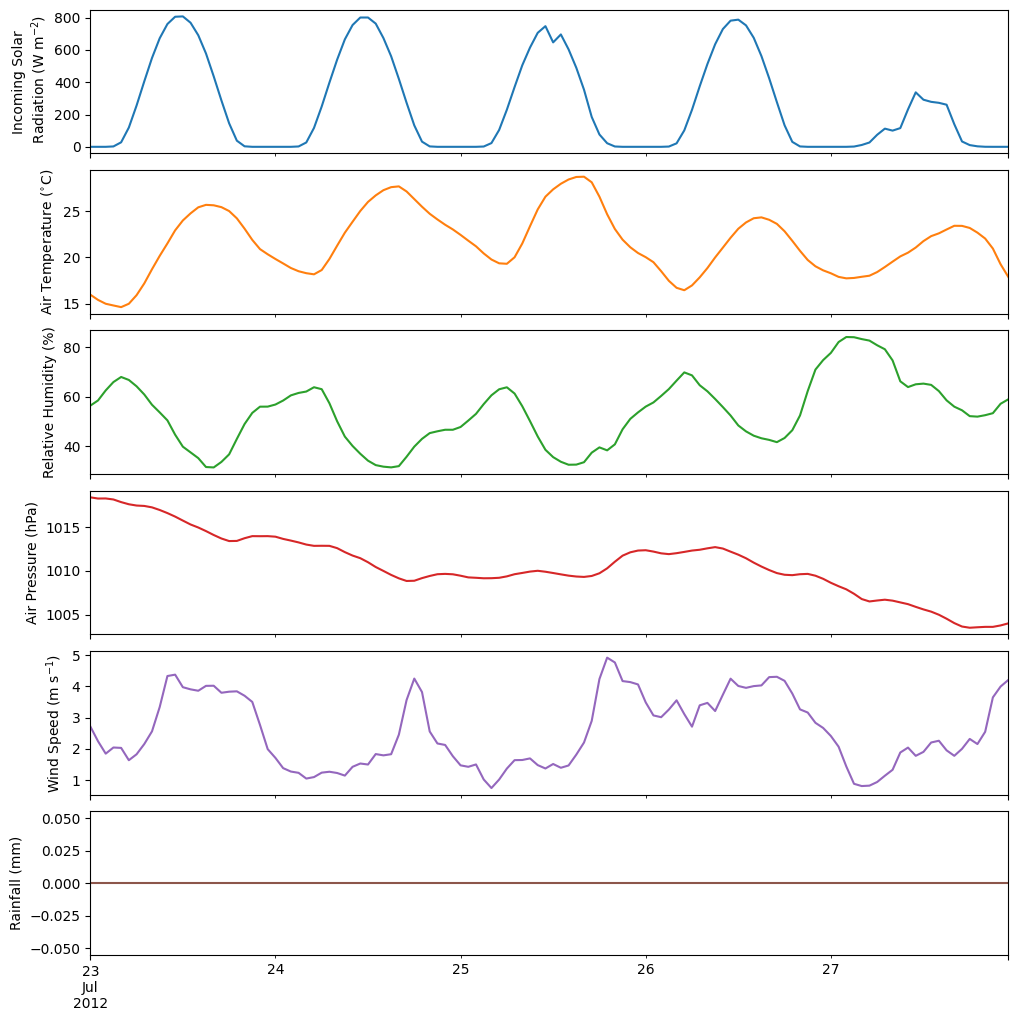

In [4]:
s = '2012 07 23'
e = '2012 07 27'

# warm week 2012  to reduce time for test setup
df_forcing=df_forcing.loc[s: e].iloc[1:]

df_plot_forcing_x = df_forcing.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])



# Run

In [6]:
df_output_s, df_state_final_s = sp.run_supy(df_forcing, df_state_init_s)
df_output_s2, df_state_final_s2 = sp.run_supy(df_forcing, df_state_init_s2)
df_output_s3, df_state_final_s3 = sp.run_supy(df_forcing, df_state_init_s3)
df_output_s4, df_state_final_s4 = sp.run_supy(df_forcing, df_state_init_s4)
df_output_s5, df_state_final_s5 = sp.run_supy(df_forcing, df_state_init_s5)
df_output_s6, df_state_final_s6 = sp.run_supy(df_forcing, df_state_init_s6)

2023-08-25 14:02:42,765 - SuPy - INFO - ====================
2023-08-25 14:02:42,766 - SuPy - INFO - Simulation period:
2023-08-25 14:02:42,767 - SuPy - INFO -   Start: 2012-07-23 00:05:00
2023-08-25 14:02:42,768 - SuPy - INFO -   End: 2012-07-27 23:55:00
2023-08-25 14:02:42,769 - SuPy - INFO - 
2023-08-25 14:02:42,770 - SuPy - INFO - No. of grids: 1
2023-08-25 14:02:42,770 - SuPy - INFO - SuPy is running in serial mode
2023-08-25 14:02:43,696 - SuPy - INFO - Execution time: 0.9 s
2023-08-25 14:02:43,697 - SuPy - INFO - ====================

2023-08-25 14:02:43,698 - SuPy - INFO - ====================
2023-08-25 14:02:43,698 - SuPy - INFO - Simulation period:
2023-08-25 14:02:43,699 - SuPy - INFO -   Start: 2012-07-23 00:05:00
2023-08-25 14:02:43,700 - SuPy - INFO -   End: 2012-07-27 23:55:00
2023-08-25 14:02:43,701 - SuPy - INFO - 
2023-08-25 14:02:43,701 - SuPy - INFO - No. of grids: 1
2023-08-25 14:02:43,702 - SuPy - INFO - SuPy is running in serial mode
2023-08-25 14:04:52,251 - Su

In [8]:
df_merge = merge_output([df_output_s,df_output_s2, df_output_s3,df_output_s4, df_output_s5, df_output_s6, ], ['sample_data(OHM)', 'Spartacus_2', 'Spartacus_3','Spartacus_4', 'Spartacus_5','Spartacus_6', ])

# Plot

var                          QS                                      \
                    Spartacus_2 Spartacus_3 Spartacus_4 Spartacus_5   
datetime                                                              
2012-07-26 14:00:00  229.880862  229.880862  241.150557  230.004646   
2012-07-26 14:05:00  226.084227  226.084227  237.422286  226.330488   
2012-07-26 14:10:00  222.397405  222.397405  233.572423  222.651433   
2012-07-26 14:15:00  218.708790  218.708790  229.837079  218.852574   
2012-07-26 14:20:00  215.020879  215.020879  226.103910  215.169038   
2012-07-26 14:25:00  211.335864  211.335864  222.375097  211.488497   
2012-07-26 14:30:00  207.655667  207.655667  218.652543  207.812863   

var                                               
                    Spartacus_6 sample_data(OHM)  
datetime                                          
2012-07-26 14:00:00  229.880862       287.797722  
2012-07-26 14:05:00  226.084227       283.899771  
2012-07-26 14:10:00  222.397405       280.001597  
2012-07-26 14:15:00  218.708790       276.105733  
2012-07-26 14:20:00  215.020879       272.214398  
2012-07-26 14:25:00  211.335864       268.329522  
2012-07-26 14:30:00  207.655667       264.452778

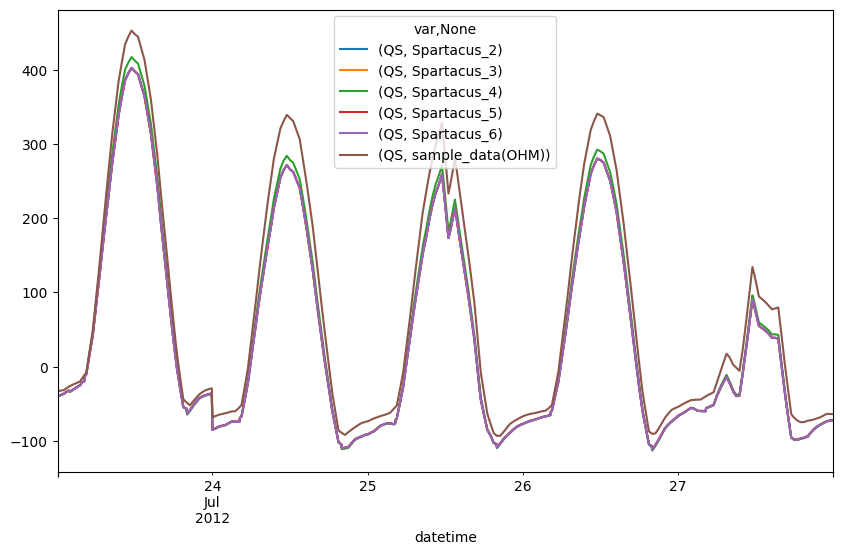

In [31]:
var = 'QS'

base = 'sample_data(OHM)'
# fig, axes = plt.subplots(2, 1, sharex=True)
df_merge.loc[s:e,[var]].plot(figsize=(10,6))
df_merge.loc['2012-07-26 14:00': '2012-07-26 14:30',[var]]

# s2_rc = in_folder + 'sample_data2/RunControl.nml'       # Sampledata Spartacus, standard values in GridLayout
# s3_rc = in_folder + 'sample_data3/RunControl.nml'       # Sampledata Spartacus Thicker first layer wall all three layers. 1.2 instad of .2
# s4_rc = in_folder + 'sample_data4/RunControl.nml'       # Sampledata Spartacus wall albedo lowered .25 instad of .5
# s5_rc = in_folder + 'sample_data5/RunControl.nml'       # Sampledata Spartacus wall emissivity lower .9 instead of .95
# s6_rc = in_folder + 'sample_data6/RunControl.nml'       # Sampledata Spartacus Thermal conductivity of layer 1 lower. .8 instead of 1.2

## No differences from Changing Wall thickness or reducing thermal conductivity of layer 1. 

## Changes in albedo highest difference (right now)